In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
import ast  # Library for handling literal_eval
from geopy.distance import geodesic
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv('merged.csv')
df = df.dropna()

# Print the column names to verify
print(df.columns)

# Setup the Isolation Forest
iso_forest = IsolationForest(n_estimators=800, contamination=0.01, random_state=42)
# Fit on the 'duration' column, you may want to reshape it if it's a Series
df['anomaly'] = iso_forest.fit_predict(df[['duration']])

# Filter out the outliers
df = df[df['anomaly'] == 1]  # Keep only normal data points
df.drop(columns='anomaly', inplace=True)  # Clean up by dropping the anomaly column

Index(['Main_Category', 'Longitude', 'Latitude', 'Day', 'duration',
       'Primary_Vehicle', 'Secondary_Vehicle', 'Is_Major_Incident', 'Advice_A',
       'Advice_B', 'Closure_Type', 'Direction', 'Main_Street',
       'Affected_Lanes', 'Actual_Number_of_Lanes ', 'Suburb', 'Traffic_Volume',
       'SA2_CODE21', 'SA3_CODE21', 'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21',
       'AREASQKM21', '0_ZID', '1_Area', '2_ML', '3_TRL', '4_PRL', '5_SRL',
       '6_TrRL', '7_RRL', '8_LsRL', '9_URL', '10_ToRL', '11_EoR', '12_NoN',
       '13_NDEs', '14_NNC2L', '15_NNC3L', '16_NNC4L', '17_AND', '18_NE',
       '19_MCI', '20_CoI', '21 NBS', '22_CA', '23_EA', '24_HA', '25_IA',
       '26_OA', '27_PA', '28_PrA', '29_RA', '30_TA', '31_WbA', '32_EoLU',
       '33_TP', '34_PD0MV', '35_PD1MV', '36_PD2MV', '37_PD3MV', '38_PD≥4MV',
       '39_PUE', '40_AMI', '41_NPTtWbyPT', '42_NPTtWbyTx', '43_NPTtWbyCD',
       '44_NPTtWbyCP', '45_NPTtWbyO', '46_NPWfH', '47_PWCJH', '48_PBCJH',
       '49_ANP_FH', 'RMS', 'Motorwa

C:\Python3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [37]:
df

,Main_Category,Longitude,Latitude,Day,duration,Primary_Vehicle,Secondary_Vehicle,Is_Major_Incident,Advice_A,Advice_B,...,Motorway crew,Emergency services,Transport for NSW,Tow truck,Heavy vehicle tow truck,Incident_Type,Num_Vehicles_Involved,Month,Hour,distance_to_CBD
0,1,151.058,-33.9431,5,39.319950,1,2,0,10,0,...,0,1,0,0,0,0,2,8,19,15.781064
1,0,151.159,-33.8096,6,12.029000,1,9,0,10,134,...,0,0,0,0,0,1,1,8,0,8.323913
2,1,150.875,-33.7344,6,16.956667,1,9,0,26,134,...,0,1,0,0,0,0,1,8,1,34.354983
3,1,150.973,-33.8172,6,42.804117,5,2,0,10,0,...,0,1,1,0,0,0,1,8,1,22.500677
4,1,150.981,-33.7919,6,40.840000,3,4,0,10,134,...,0,0,0,0,0,0,3,8,1,22.753003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85606,0,151.193,-33.8877,5,0.073550,1,8,0,26,134,...,0,0,0,1,0,1,1,8,8,2.041047
85607,1,151.054,-33.7991,6,0.000000,6,8,0,26,134,...,0,0,0,1,0,0,2,8,4,16.348803
85608,1,151.066,-33.7527,6,0.000000,3,8,0,3,134,...,0,0,0,0,0,0,3,8,4,18.664398
85609,0,151.154,-33.7587,6,0.000000,5,8,0,3,134,...,0,0,0,0,0,1,1,8,4,13.608235


Script started...
Starting model training and evaluation...
Training model: XGBoost Classifier


`use_label_encoder` is deprecated in 1.7.0.


Accuracy for XGBoost Classifier: 0.683725753324387, F1 Score: 0.5691016371644644
Training model: LightGBM Classifier
Accuracy for LightGBM Classifier: 0.694888373795291, F1 Score: 0.5743703199455412
Training model: Random Forest Classifier
Accuracy for Random Forest Classifier: 0.6710991826277907, F1 Score: 0.5338059830537782
Training model: Extra Trees Classifier
Accuracy for Extra Trees Classifier: 0.6596925704526047, F1 Score: 0.5309794031105506
Training model: Decision Tree Classifier
Accuracy for Decision Tree Classifier: 0.605587410028059, F1 Score: 0.5148559423769506
Plotting model performance...
Model performance plot saved as 'model_performance_classification_metrics.pdf'.
Script completed successfully.


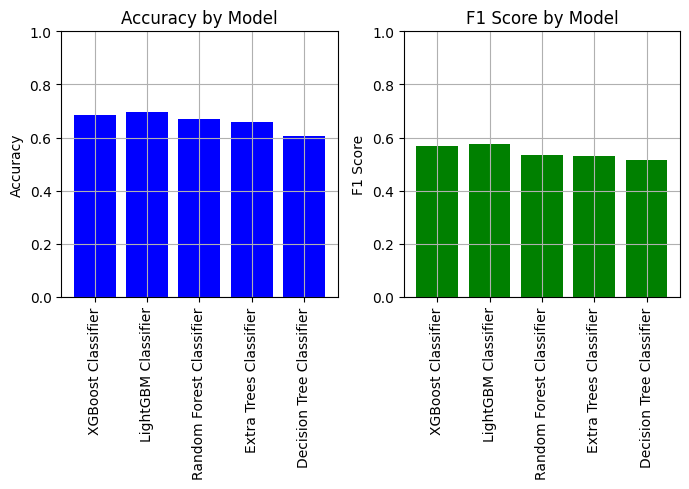

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def train_models_and_plot(names, models, X_train, X_test, y_train, y_test):
    print("Starting model training and evaluation...")
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)
    
    performances = []
    for name, model in zip(names, models):
        print(f"Training model: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
        print(f"Accuracy for {name}: {accuracy}, F1 Score: {f1}")
        performances.append((name, accuracy, f1))
    
    perf_df = pd.DataFrame(performances, columns=['Model', 'Accuracy', 'F1 Score'])
    print("Plotting model performance...")

    # Creating a single figure with two subplots (vertically arranged)
    fig, ax = plt.subplots(1, 2, figsize=(7, 5))
    
    # Plot for Accuracy
    ax[0].bar(perf_df['Model'], perf_df['Accuracy'], color='blue')
    ax[0].set_title('Accuracy by Model')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_ylim([0, 1])
    ax[0].grid(True)  # Enable grid
    for tick in ax[0].get_xticklabels():
        tick.set_rotation(90)  # Rotate model names for better readability
    
    # Plot for F1 Score
    ax[1].bar(perf_df['Model'], perf_df['F1 Score'], color='green')
    ax[1].set_title('F1 Score by Model')
    ax[1].set_ylabel('F1 Score')
    ax[1].set_ylim([0, 1])
    ax[1].grid(True)  # Enable grid
    for tick in ax[1].get_xticklabels():
        tick.set_rotation(90)  # Rotate model names for better readability
    
    plt.tight_layout()  # Adjust layout to not overlap
    plt.savefig('model_performance_classification_metrics.pdf')
    print("Model performance plot saved as 'model_performance_classification_metrics.pdf'.")


def main():
    print("Script started...")
    # Example DataFrame creation
    # Placeholder for actual data loading logic
    
    # Assuming df is already defined
    # Convert 'duration' into a binary classification target
    y = (df['duration'] > 35).astype(int)
    X = df.drop(['duration'], axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model names and instances
    names = ["XGBoost Classifier", "LightGBM Classifier", "Random Forest Classifier", "Extra Trees Classifier", "Decision Tree Classifier"]
    models = [
        XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='rmse'),
        LGBMClassifier(n_estimators=200, random_state=42),
        RandomForestClassifier(n_estimators=200, n_jobs=10, random_state=42),
        ExtraTreesClassifier(n_estimators=200, n_jobs=10, random_state=42),
        DecisionTreeClassifier(random_state=42)
    ]
    
    train_models_and_plot(names, models, X_train, X_test, y_train, y_test)
    
    print("Script completed successfully.")

if __name__ == '__main__':
    main()


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def train_models_and_plot(names, models, X_train, X_test, y_train, y_test):
    print("Starting model training and evaluation...")
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)
    
    performance = []
    epsilon = 1e-6  # A small number to prevent division by zero

    # Filter out zero or negative values from y_test for valid MAPE calculation
    valid_indices = y_test > 0
    y_test_filtered = y_test[valid_indices]
    X_test_filtered = X_test[valid_indices]

    for name, model in zip(names, models):
        print(f"Training model: {name}")
        model.fit(X_train, y_train)
        y_pred_full = np.expm1(model.predict(X_test))
        y_pred = y_pred_full[valid_indices]  # Apply the same filter to predictions
        
        rmse = np.sqrt(mean_squared_error(y_test_filtered, y_pred))
        r2 = r2_score(y_test_filtered, y_pred)  # Calculate R2 score
        
        # Calculate MAPE with epsilon to handle division by small numbers
        mape = np.mean(np.abs((y_test_filtered - y_pred) / (y_test_filtered + epsilon))) * 100
        
        print(f"RMSE for {name}: {rmse}")
        print(f"R2 Score for {name}: {r2}")
        print(f"MAPE for {name}: {mape}%")
        
        performance.append((name, rmse, r2, mape))
    
    perf_df = pd.DataFrame(performance, columns=['Model', 'RMSE', 'R2 Score', 'MAPE'])
    print("Plotting model performance...")
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    perf_df.plot(kind='bar', x='Model', y='RMSE', ax=ax1, color='red', position=0, width=0.25)
    ax2 = ax1.twinx()
    perf_df.plot(kind='bar', x='Model', y='R2 Score', ax=ax2, color='blue', position=1, width=0.25)
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    perf_df.plot(kind='bar', x='Model', y='MAPE', ax=ax3, color='green', position=2, width=0.25)
    
    ax1.set_title('Model Performance: RMSE, R2 Score, and MAPE')
    ax1.set_ylabel('RMSE', color='red')
    ax2.set_ylabel('R2 Score', color='blue')
    ax3.set_ylabel('MAPE (%)', color='green')
    ax1.set_xlabel('Model')
    ax1.grid()
    plt.tight_layout()
    plt.savefig('model_performance_with_mape.pdf')
    print("Model performance plot saved as 'model_performance_with_mape.pdf'.")



def plot_feature_importance(model, X, model_name):
    """
    Plot and save the feature importances of the given model, focusing on the top 10 features.

    Args:
    - model: The trained model object.
    - X (DataFrame): The feature dataset.
    - model_name (str): The name of the model, used for titling and naming the output file.
    """
    print(f"Plotting top 10 feature importances for {model_name}...")
    importances = model.feature_importances_
    indices = np.argsort(importances)[-12:]  # Get indices of top 10 features
    # Adjust the plotting to focus on these top 10 features
    plt.figure(figsize=(5, 4))
    plt.title(f"Top 10 Feature Importances for {model_name}")
    plt.bar(range(12), importances[indices], color="r", align="center")
    # Use the indices to map back to feature names
    plt.xticks(range(12), X.columns[indices], rotation=45, ha="right")
    plt.xlim([-1, 12])  # Adjust xlim to focus on top 10 features
    plt.grid()
    plt.tight_layout()
    filename = f'top_10_feature_importance_{model_name.replace(" ", "_").lower()}.pdf'
    plt.savefig(filename)
    print(f"Top 12 feature importance plot saved as '{filename}'.")
    plt.close()  # Close the plot to free memory and avoid overlap in subsequent plots



def main():
    print("Script started...")
    # Example DataFrame creation
    # Replace this with your actual data loading logic
#     np.random.seed(42)
#     df = pd.DataFrame(np.random.rand(100, 4), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
#     df['duration'] = np.random.rand(100) * 100  # Synthetic target variable

    names = ["XGBoost", "LightGBM", "Random Forest", "Extra Trees", "Decision Tree"]
    models = [
        xgb.XGBRegressor(n_estimators=200, objective='reg:squarederror'),
        lgb.LGBMRegressor(n_estimators=200, random_state=42),
        RandomForestRegressor(n_estimators=200, n_jobs=10, random_state=42),
        ExtraTreesRegressor (n_estimators=200,n_jobs=10, random_state=42),
        DecisionTreeRegressor(random_state=42)
    ]

    # Data preparation and model training...
    
    # Plot feature importances for each model

        
    X = df.drop(['duration'], axis=1)
    y = np.log1p(df['duration'])  # Apply log1p transformation for regression targets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    train_models_and_plot(names, models, X_train, X_test, y_train, y_test)
    
    for model, name in zip(models, names):
        plot_feature_importance(model, X, name)
    # Example of plotting feature importance for Extra Trees model
#     plot_feature_importance(models[-1], X)  # Extra Trees for feature importance
    
    print("Script completed successfully.")

if __name__ == '__main__':
    main()


Script started...
Starting model training and evaluation...
Training model: XGBoost
RMSE for XGBoost: 35.26680666817956
R2 Score for XGBoost: 0.11893494375696345
MAPE for XGBoost: 4933.7815419717435%
Training model: LightGBM
RMSE for LightGBM: 35.13570092632458
R2 Score for LightGBM: 0.12547355539959648
MAPE for LightGBM: 4987.790263074123%
Training model: Random Forest


KeyboardInterrupt: 

In [30]:
import numpy as np
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already defined
X = df.drop(['duration'], axis=1)
y = df['duration']  # Log transform the target variable

# Convert the dataset into XGBoost's DMatrix format
dtrain = xgb.DMatrix(X, label=y, feature_names=X.columns)

# Define the parameters for the XGBoost model
params = {
    'objective': 'reg:squaredlogerror',
    'eval_metric': 'rmse',
    'booster': 'gbtree',
    'random_state': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Initialize SHAP explainer and compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)

# Calculate feature importance as the sum of absolute SHAP values
feature_importance = np.sum(np.abs(shap_values), axis=0)
sorted_features_idx = np.argsort(-feature_importance)[:12]

# Prepare for plotting
top_features_names = X.columns[sorted_features_idx]
filtered_shap_values = shap_values[:, sorted_features_idx]

# Plotting the SHAP summary plot for the top 12 features
plt.figure(figsize=(10, 6))
shap.summary_plot(filtered_shap_values, X.iloc[:, sorted_features_idx], feature_names=top_features_names,show=False)
plt.tight_layout()
# Save the plot
plt.savefig('top_12_feature_importance_summary_original_scale_xgboost.pdf', bbox_inches='tight')
plt.close()


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

def train_and_evaluate_for_thresholds(X, y_values, thresholds):
    performances = []
    class_balances = []  # To store class balance for each threshold
    for threshold in thresholds:
        y = (y_values > threshold).astype(int)
        class_balance = y.mean() * 100  # Percentage of positive class
        class_balances.append(class_balance)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='binary')
        performances.append((threshold, accuracy, f1))
        print(f"Threshold: {threshold}, Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Class Balance: {class_balance:.2f}%")
    
    perf_df = pd.DataFrame(performances, columns=['Threshold', 'Accuracy', 'F1 Score'])
    perf_df['Class Balance'] = class_balances  # Append class balance to the DataFrame
    return perf_df

def plot_performance(perf_df):
    fig, ax1 = plt.subplots(figsize=(6, 5))

    # Plot Accuracy with primary axis
    color = 'tab:blue'
    ax1.set_xlabel('Threshold (minutes)')
    ax1.set_ylabel('Accuracy', color=color)
    ax1.plot(perf_df['Threshold'], perf_df['Accuracy'], marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    # Create a second y-axis for class balance
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Class Balance (%)', color=color)
    ax2.plot(perf_df['Threshold'], perf_df['Class Balance'], marker='o', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Add a horizontal line at 50% class balance
    ax2.axhline(50, color='red', linestyle='--', linewidth=1.8)
    ax2.annotate('50% balance', xy=(0.95, 0.5), xycoords='axes fraction', color='red', horizontalalignment='right')

    fig.tight_layout()  # To adjust plot to fit labels
    plt.title('Accuracy and Class Balance by Threshold')
    plt.savefig('accuracy_and_class_balance_by_threshold.pdf')
    print("Performance plot saved as 'accuracy_and_class_balance_by_threshold.pdf'.")
    plt.show()

def main():
    print("Script started...")
    # Assuming df is already defined
    X = df.drop(['duration'], axis=1)
    y_values = df['duration']

    thresholds = range(20, 65, 5)
    perf_df = train_and_evaluate_for_thresholds(X, y_values, thresholds)
    plot_performance(perf_df)

    print("Script completed successfully.")

if __name__ == '__main__':
    main()


Script started...


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 20, Accuracy: 0.70, F1 Score: 0.79, Class Balance: 64.50%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 25, Accuracy: 0.67, F1 Score: 0.71, Class Balance: 55.49%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 30, Accuracy: 0.67, F1 Score: 0.64, Class Balance: 47.53%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 35, Accuracy: 0.69, F1 Score: 0.57, Class Balance: 40.47%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 40, Accuracy: 0.71, F1 Score: 0.50, Class Balance: 34.59%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 45, Accuracy: 0.74, F1 Score: 0.44, Class Balance: 29.53%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 50, Accuracy: 0.77, F1 Score: 0.38, Class Balance: 25.44%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 55, Accuracy: 0.79, F1 Score: 0.34, Class Balance: 22.02%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 60, Accuracy: 0.82, F1 Score: 0.31, Class Balance: 19.27%
Performance plot saved as 'performance_by_threshold.pdf'.


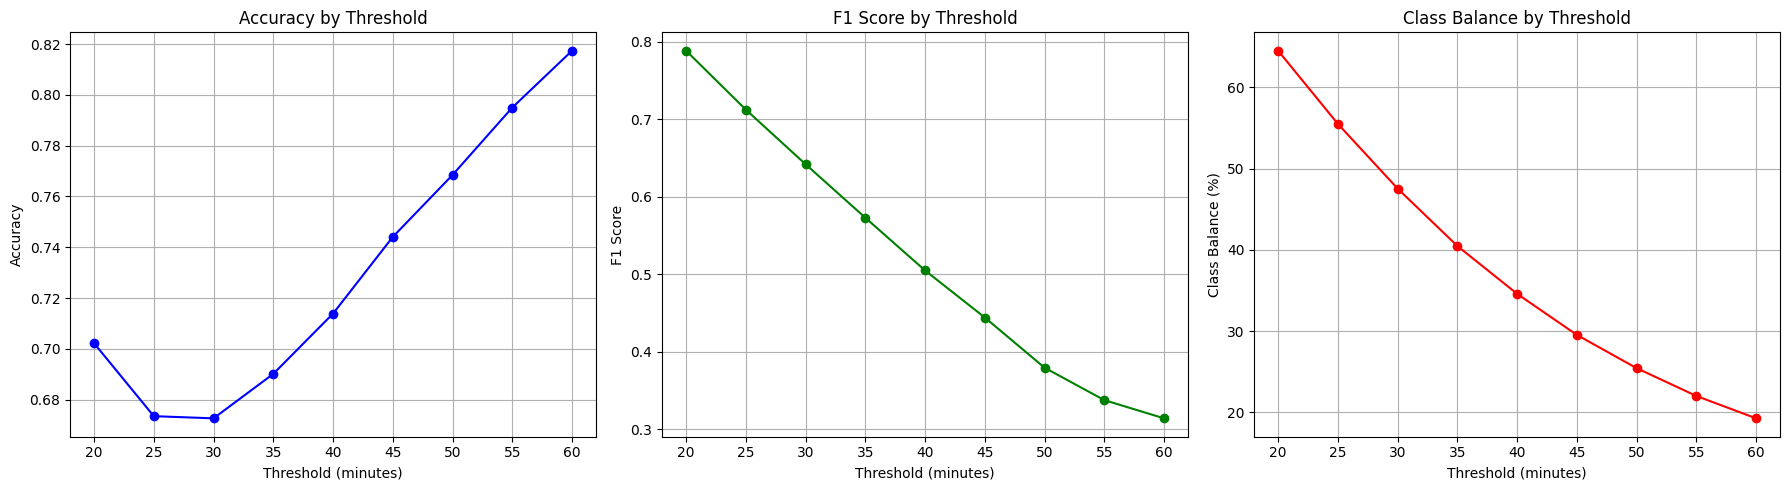

Script completed successfully.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

def train_and_evaluate_for_thresholds(X, y_values, thresholds):
    performances = []
    class_balances = []  # To store class balance for each threshold
    for threshold in thresholds:
        y = (y_values > threshold).astype(int)
        class_balance = y.mean() * 100  # Percentage of positive class
        class_balances.append(class_balance)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='binary')
        performances.append((threshold, accuracy, f1))
        print(f"Threshold: {threshold}, Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Class Balance: {class_balance:.2f}%")
    
    perf_df = pd.DataFrame(performances, columns=['Threshold', 'Accuracy', 'F1 Score'])
    perf_df['Class Balance'] = class_balances  # Append class balance to the DataFrame
    return perf_df

def plot_performance(perf_df):
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # Increased to three subplots

    # Plot Accuracy
    ax[0].plot(perf_df['Threshold'], perf_df['Accuracy'], marker='o', color='blue', label='Accuracy')
    ax[0].set_title('Accuracy by Threshold')
    ax[0].set_xlabel('Threshold (minutes)')
    ax[0].set_ylabel('Accuracy')
    ax[0].grid(True)
    
    # Plot F1 Score
    ax[1].plot(perf_df['Threshold'], perf_df['F1 Score'], marker='o', color='green', label='F1 Score')
    ax[1].set_title('F1 Score by Threshold')
    ax[1].set_xlabel('Threshold (minutes)')
    ax[1].set_ylabel('F1 Score')
    ax[1].grid(True)

    # Plot Class Balance
    ax[2].plot(perf_df['Threshold'], perf_df['Class Balance'], marker='o', color='red', label='Class Balance')
    ax[2].set_title('Class Balance by Threshold')
    ax[2].set_xlabel('Threshold (minutes)')
    ax[2].set_ylabel('Class Balance (%)')
    ax[2].grid(True)

    plt.tight_layout()
    plt.savefig('performance_by_threshold.pdf')
    print("Performance plot saved as 'performance_by_threshold.pdf'.")
    plt.show()

def main():
    print("Script started...")
    # Assuming df is already defined
    X = df.drop(['duration'], axis=1)
    y_values = df['duration']

    thresholds = range(20, 65, 5)
    perf_df = train_and_evaluate_for_thresholds(X, y_values, thresholds)
    plot_performance(perf_df)

    print("Script completed successfully.")

if __name__ == '__main__':
    main()


Script started...


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 20, Accuracy: 0.70, F1 Score: 0.79, Class Balance: 64.50%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 25, Accuracy: 0.67, F1 Score: 0.71, Class Balance: 55.49%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 30, Accuracy: 0.67, F1 Score: 0.64, Class Balance: 47.53%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 35, Accuracy: 0.69, F1 Score: 0.57, Class Balance: 40.47%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 40, Accuracy: 0.71, F1 Score: 0.50, Class Balance: 34.59%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 45, Accuracy: 0.74, F1 Score: 0.44, Class Balance: 29.53%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 50, Accuracy: 0.77, F1 Score: 0.38, Class Balance: 25.44%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 55, Accuracy: 0.79, F1 Score: 0.34, Class Balance: 22.02%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 60, Accuracy: 0.82, F1 Score: 0.31, Class Balance: 19.27%
Performance plot saved as 'accuracy_and_class_balance_by_threshold.pdf'.


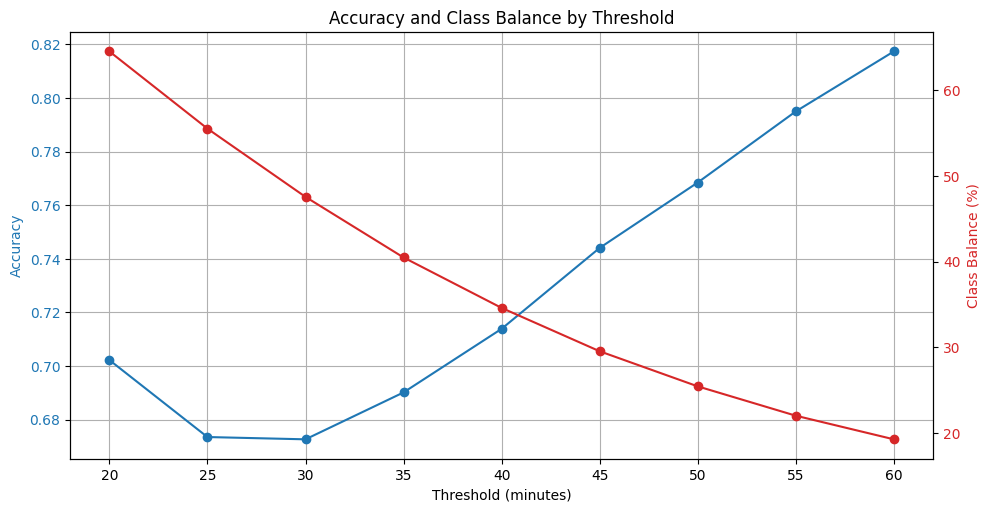

Script completed successfully.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

def train_and_evaluate_for_thresholds(X, y_values, thresholds):
    performances = []
    class_balances = []  # To store class balance for each threshold
    for threshold in thresholds:
        y = (y_values > threshold).astype(int)
        class_balance = y.mean() * 100  # Percentage of positive class
        class_balances.append(class_balance)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='binary')
        performances.append((threshold, accuracy, f1))
        print(f"Threshold: {threshold}, Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Class Balance: {class_balance:.2f}%")
    
    perf_df = pd.DataFrame(performances, columns=['Threshold', 'Accuracy', 'F1 Score'])
    perf_df['Class Balance'] = class_balances  # Append class balance to the DataFrame
    return perf_df

def plot_performance(perf_df):
    fig, ax1 = plt.subplots(figsize=(6, 5))

    # Plot Accuracy with primary axis
    color = 'tab:blue'
    ax1.set_xlabel('Threshold (minutes)')
    ax1.set_ylabel('Accuracy', color=color)
    ax1.plot(perf_df['Threshold'], perf_df['Accuracy'], marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    # Create a second y-axis for class balance
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Class Balance (%)', color=color)
    ax2.plot(perf_df['Threshold'], perf_df['Class Balance'], marker='o', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # To adjust plot to fit labels
    plt.title('Accuracy and Class Balance by Threshold')
    plt.savefig('accuracy_and_class_balance_by_threshold.pdf')
    print("Performance plot saved as 'accuracy_and_class_balance_by_threshold.pdf'.")
    plt.show()

def main():
    print("Script started...")
    # Assuming df is already defined
    X = df.drop(['duration'], axis=1)
    y_values = df['duration']

    thresholds = range(20, 65, 5)
    perf_df = train_and_evaluate_for_thresholds(X, y_values, thresholds)
    plot_performance(perf_df)

    print("Script completed successfully.")

if __name__ == '__main__':
    main()


Script started...


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 20, Accuracy: 0.70, F1 Score: 0.79, Class Balance: 64.50%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 25, Accuracy: 0.67, F1 Score: 0.71, Class Balance: 55.49%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 30, Accuracy: 0.67, F1 Score: 0.64, Class Balance: 47.53%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 35, Accuracy: 0.69, F1 Score: 0.57, Class Balance: 40.47%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 40, Accuracy: 0.71, F1 Score: 0.50, Class Balance: 34.59%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 45, Accuracy: 0.74, F1 Score: 0.44, Class Balance: 29.53%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 50, Accuracy: 0.77, F1 Score: 0.38, Class Balance: 25.44%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 55, Accuracy: 0.79, F1 Score: 0.34, Class Balance: 22.02%


`use_label_encoder` is deprecated in 1.7.0.


Threshold: 60, Accuracy: 0.82, F1 Score: 0.31, Class Balance: 19.27%
Performance plot saved as 'accuracy_and_class_balance_by_threshold.pdf'.


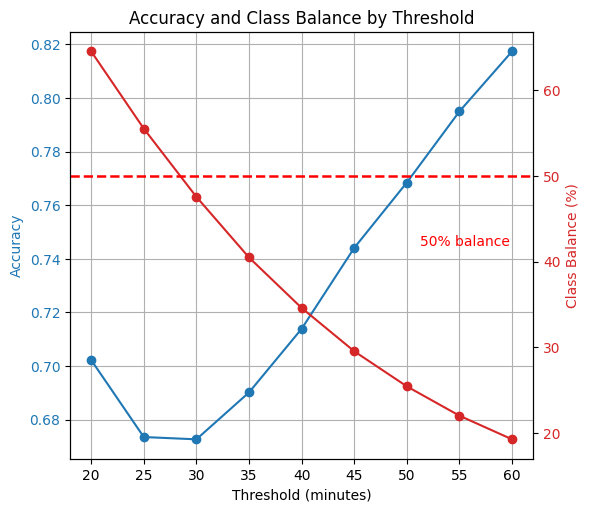

Script completed successfully.
